<a href="https://www.kaggle.com/code/joonhwanko/basic-tutorial-2ways-to-train-datas?scriptVersionId=163682331" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

#  i prepared 2 ways to train datas on long ver
## `short ver` vs `long ver` 
* 4 columns used ('Age', 'Sex', 'pclass', 'Embarked') 
* if you want to see A to Z, then check out `long ver` first

### 1. short ver
* labelEncoder
* train_test_split 
* RandomForestClassifier
* LinearRegression
* roc_auc_score



### 2. long ver
* matplotlib & seaborn
* LabelEncoder
* train_test_split & roc_auc_score
* RandomForestClassifier
* LinearRegression
* KFold & cross_val_score


### i refered to 3 codes
* thank you all.
1. from -> https://www.kaggle.com/code/mahdialfred/titanic-logistic
2. from -> https://www.kaggle.com/code/mostafaelhabashy/top-6-0-79425-titanic-dataset
3. from -> https://computer-science-student.tistory.com/113

## 1. short ver

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        

src = '/kaggle/input/titanic'
train_df = pd.read_csv(src + '/train.csv') 
test_df = pd.read_csv(src + '/test.csv')

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
train_df.shape # (891, 12)
test_df.shape # (418, 11)

(418, 11)

In [3]:
def cleaning(k):
    cols_to_drop = ['Name', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin']
    
    # drop
    k = k.drop(cols_to_drop, axis=1, errors = 'ignore')
    n_col = ['Age']
    for n in n_col:
        k[n] = k[n].fillna(k[n].mean())
    
    # fillna
    k['Embarked'] = k['Embarked'].fillna('S')
    # 0, 1, 2 변경
    k['Embarked'] = k['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
    return k

train = cleaning(train_df)
test = cleaning(test_df)

In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols = ['Sex', 'Embarked']
for c in cols:
    train[c] = le.fit_transform(train[c])
    test[c] = le.transform(test[c])
    print(le.classes_)

['female' 'male']
[0 1 2]


In [5]:
train.shape # (891, 6)
test.shape # (418, 5)

X = train.drop(['PassengerId', 'Survived'],axis=1)
target = train['Survived']
X_test = test.drop(["PassengerId"],axis="columns")
PassengerId = test.pop('PassengerId')
X.shape, target.shape, X_test.shape, PassengerId.shape

((891, 4), (891,), (418, 4), (418,))

In [6]:
# split
from sklearn.model_selection import train_test_split
X_tr, X_val , y_tr, y_val = train_test_split(X,target,random_state=2024,test_size=0.2)
X_tr.shape, X_val.shape, y_tr.shape, y_val.shape

((712, 4), (179, 4), (712,), (179,))

In [7]:
# rf
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(criterion="entropy",
                            n_estimators = 1100,
                           max_features = "log2",
                           max_depth = 5,
                           min_samples_split = 2,
                           random_state = 2024)
rf.fit(X_tr, y_tr)
pred_rf = rf.predict_proba(X_val)
pred_rf.shape # (179, 2)
pred_rf

array([[0.20812662, 0.79187338],
       [0.88925129, 0.11074871],
       [0.31578503, 0.68421497],
       [0.8732022 , 0.1267978 ],
       [0.88753979, 0.11246021],
       [0.866083  , 0.133917  ],
       [0.91037947, 0.08962053],
       [0.14101366, 0.85898634],
       [0.66058649, 0.33941351],
       [0.86348865, 0.13651135],
       [0.19195994, 0.80804006],
       [0.20812662, 0.79187338],
       [0.86961175, 0.13038825],
       [0.23830735, 0.76169265],
       [0.16750148, 0.83249852],
       [0.52220504, 0.47779496],
       [0.61619552, 0.38380448],
       [0.86538481, 0.13461519],
       [0.50799119, 0.49200881],
       [0.02401233, 0.97598767],
       [0.91037947, 0.08962053],
       [0.88049869, 0.11950131],
       [0.88270955, 0.11729045],
       [0.87702388, 0.12297612],
       [0.87767382, 0.12232618],
       [0.07253776, 0.92746224],
       [0.66635753, 0.33364247],
       [0.04278632, 0.95721368],
       [0.90914681, 0.09085319],
       [0.87368587, 0.12631413],
       [0.

In [8]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_val, pred_rf[:, 1])

0.8602766798418973

In [9]:
pred = rf.predict_proba(X_test)
pred

array([[0.9527562 , 0.0472438 ],
       [0.79501921, 0.20498079],
       [0.92804512, 0.07195488],
       [0.85994073, 0.14005927],
       [0.60460877, 0.39539123],
       [0.87047428, 0.12952572],
       [0.2403296 , 0.7596704 ],
       [0.89357957, 0.10642043],
       [0.4071472 , 0.5928528 ],
       [0.89070109, 0.10929891],
       [0.87539329, 0.12460671],
       [0.66635753, 0.33364247],
       [0.07407064, 0.92592936],
       [0.86854737, 0.13145263],
       [0.06077174, 0.93922826],
       [0.05905988, 0.94094012],
       [0.93090889, 0.06909111],
       [0.82071725, 0.17928275],
       [0.59769599, 0.40230401],
       [0.67354161, 0.32645839],
       [0.67827359, 0.32172641],
       [0.66431423, 0.33568577],
       [0.05553221, 0.94446779],
       [0.59190229, 0.40809771],
       [0.06122034, 0.93877966],
       [0.89488015, 0.10511985],
       [0.02248082, 0.97751918],
       [0.82724704, 0.17275296],
       [0.64848284, 0.35151716],
       [0.86321089, 0.13678911],
       [0.

In [10]:
result = pd.DataFrame({
    'PassengerId': PassengerId,
    'Survived' : pred[:, 1]
})
result.shape #(418, 2)
result

,PassengerId,Survived
0,892,0.047244
1,893,0.204981
2,894,0.071955
3,895,0.140059
4,896,0.395391
...,...,...
413,1305,0.124607
414,1306,0.971156
415,1307,0.110980
416,1308,0.124607


In [11]:
result.to_csv('submission.csv', index=False)

 ## **** short ver is just done, down below i am going to begin writting about `long ver`

In [12]:
##################################################################################

# 2. long ver

In [13]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        

src = '/kaggle/input/titanic'
train_df = pd.read_csv(src + '/train.csv') 
test_df = pd.read_csv(src + '/test.csv')
print('--'*23)

print(train_df.shape)
print(test_df.shape)

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv
----------------------------------------------
(891, 12)
(418, 11)


In [14]:
print(train_df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [15]:
print(test_df.head())

   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S  


# 1) EDA

In [16]:
# train & test 서로 없는 컬럼 확인

train_col = set(train_df.columns)
test_col = set(test_df.columns)
what = train_col.symmetric_difference(test_col)
print(what)

# {'Survived'}

{'Survived'}


In [17]:
# where is 'survived'? 
if 'Survived' in train_df.columns:
    print("'Survived' in train_df")
else:
    print("'Survived' not in train_df")

'Survived' in train_df


In [18]:
print(train_df['Survived'].value_counts())

Survived
0    549
1    342
Name: count, dtype: int64


In [19]:
print(train_df['Pclass'].value_counts())

Pclass
3    491
1    216
2    184
Name: count, dtype: int64


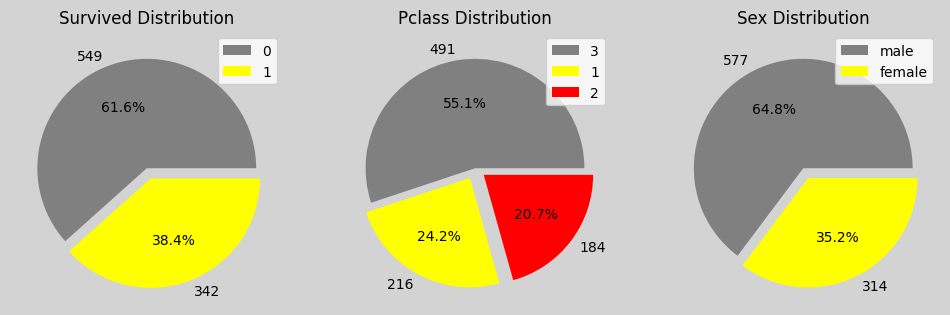

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# figure(도표),   #axis(축)
fig, ax = plt.subplots(1, 3, facecolor = 'lightgray', figsize=(12, 6))
cols = ['Survived', "Pclass", 'Sex']
colors = [("gray", "yellow"), ("gray", "yellow", "red"), ("gray", "yellow")]
explod = [(0, 0.1), (0, 0.1, 0.1), (0, 0.1)]
for i, c in enumerate(cols):
    data = train_df[c].value_counts()
    ax[i].pie(data, colors=colors[i], labels = data.values,
             explode = explod[i], autopct = "%0.1f%%")
    
    # loc=1은 범례를 오른쪽 상단에
    ax[i].legend(data.index, loc = 1)
    ax[i].set(title = f"{c} Distribution")
    

In [21]:
mean_Age_by_Pclass = train_df.groupby(train_df['Pclass'])["Age"].mean()
print(mean_Age_by_Pclass)

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64


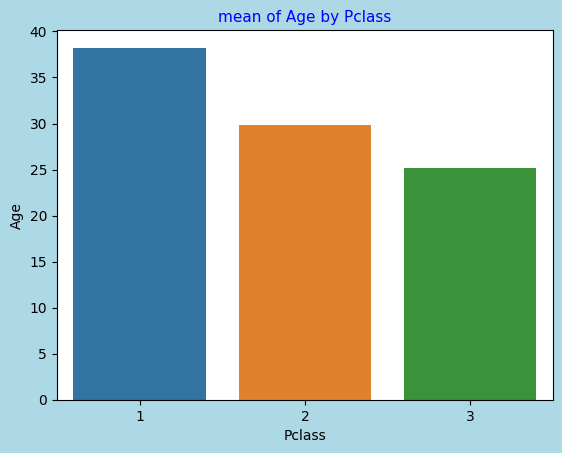

In [22]:
# figure(도표),   #axis(축)
import warnings

# ignore warning
warnings.simplefilter(action='ignore', category=FutureWarning)

fig, ax = plt.subplots(facecolor="lightblue")
sns.barplot(x='Pclass', y='Age', data=mean_Age_by_Pclass.reset_index(),
            palette="deep", ax=ax, ci=None, width=0.5)
ax.set_title("mean of Age by Pclass", color="blue", size=11)

# font
plt.rcParams['font.family'] = 'NanumGothic'

sns.barplot(x='Pclass', y='Age', data=mean_Age_by_Pclass.reset_index(), errorbar=None, ci=None)

# show
plt.show()

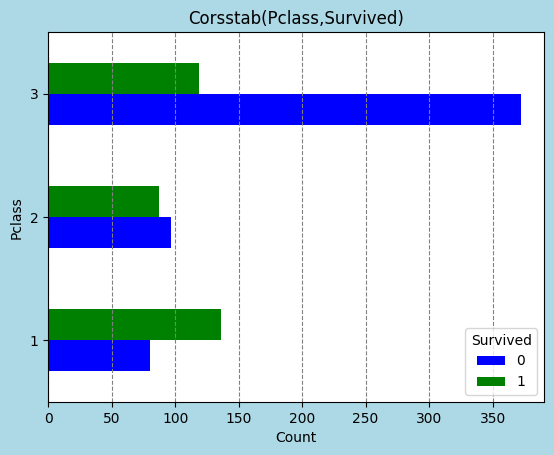

In [23]:
fig , ax = plt.subplots(facecolor="lightblue")
pd.crosstab(train_df["Pclass"],train_df["Survived"]).plot(kind="barh",color=["blue","green"],ax=ax)
ax.set(xlabel="Count",title="Corsstab(Pclass,Survived)")
ax.grid(axis="x",ls="--",color="gray");

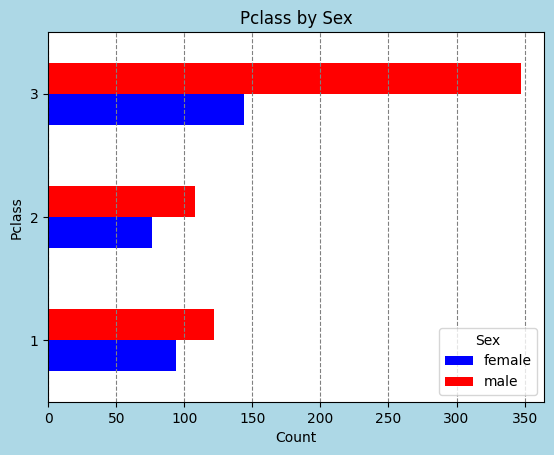

In [24]:
fig, ax = plt.subplots(facecolor = "lightblue")
pd.crosstab(train_df["Pclass"], train_df['Sex']).plot(kind='barh', color = ["blue", "red"], ax=ax)
ax.set(xlabel = "Count", title = "Pclass by Sex")
ax.grid(axis="x", ls = "--", color = "gray")

In [25]:
train_df.sort_values(by= ["Age", "Survived"], ascending=False)[["Survived", "Age"]].head(5)

,Survived,Age
630,1,80.0
851,0,74.0
96,0,71.0
493,0,71.0
116,0,70.5


* 80 years old person is the oldest survived

In [26]:
train_df.sort_values(by = ["Age", "Survived"])[["Survived", "Age"]].head(5)

,Survived,Age
803,1,0.42
755,1,0.67
469,1,0.75
644,1,0.75
78,1,0.83


* 4 months old baby is the youngest survived

In [27]:
train_df.query("(Survived == 1) & (Age <=1)").iloc[:, :6]

,PassengerId,Survived,Pclass,Name,Sex,Age
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83
172,173,1,3,"Johnson, Miss. Eleanor Ileen",female,1.00
183,184,1,2,"Becker, Master. Richard F",male,1.00
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92
381,382,1,3,"Nakid, Miss. Maria (""Mary"")",female,1.00
469,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75
644,645,1,3,"Baclini, Miss. Eugenie",female,0.75
755,756,1,2,"Hamalainen, Master. Viljo",male,0.67
788,789,1,3,"Dean, Master. Bertram Vere",male,1.00
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42


* baby up untill 1 years old --> 12 survived

# 2) preprocessing

In [28]:
# what column is different?

train_col = set(train_df.columns)
test_col = set(test_df.columns)
what = train_col.symmetric_difference(test_col)
print(what)

# nothing

{'Survived'}


In [29]:
train_df.isnull().sum() # Age 177, Cabin 687, Embarked 2
test_df.isnull().sum() # Age  86, Cabin 327

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [30]:
Age_mean1 = train_df['Age'].mean()
Age_mean2 = test_df['Age'].mean()

train_df['Age'].fillna(Age_mean1, inplace = True)
test_df['Age'].fillna(Age_mean2, inplace = True)

In [31]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [32]:
train_df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [33]:
train_df['Embarked'].fillna('S', inplace=True)

# str(S, C, Q) gonna be int(0, 1, 2)
train_df['Embarked'] = train_df['Embarked'].map({'S':0, 'C':1, 'Q':2}).astype(int)
test_df['Embarked'] = test_df['Embarked'].map({'S':0, 'C':1, 'Q':2}).astype(int)

In [34]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols = ['Sex', 'Embarked']
for c in cols:
    train_df[c] = le.fit_transform(train_df[c])
    test_df[c] = le.transform(test_df[c])
    print(le.classes_)

['female' 'male']
[0 1 2]


In [35]:
X = train_df.drop(['Name', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'PassengerId', 'Survived'], axis=1)
target = train_df['Survived']
X_test = test_df.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'PassengerId'], axis=1)
PassengerId = test_df.pop("PassengerId")
X.shape, target.shape, X_test.shape, PassengerId.shape

((891, 4), (891,), (418, 4), (418,))

# 3) split for training and validation

## train_test_split & roc_auc_score `vs` KFold & cross_val_score

In [36]:
from sklearn.model_selection import train_test_split
X_tr, X_val, y_tr, y_val = train_test_split(X, target, test_size=0.2, stratify=target)
X_tr.shape, X_val.shape, y_tr.shape, y_val.shape

((712, 4), (179, 4), (712,), (179,))

In [37]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(criterion="entropy",
                            n_estimators = 1100,
                           max_features = "log2",
                           max_depth = 5,
                           min_samples_split = 2,
                           random_state = 2024)
rf.fit(X_tr, y_tr)
pred_rf = rf.predict_proba(X_val)
#pred_rf

In [38]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=2024)
lr.fit(X_tr, y_tr)
pred_lr = lr.predict_proba(X_val)
#pred_lr

In [39]:
from sklearn.metrics import roc_auc_score
rf_s = round(roc_auc_score(y_val, pred_rf[:, 1]), 2) # 0.86
lr_s = round(roc_auc_score(y_val, pred_lr[:, 1]), 2) # 0.87
res1 = {'rf_s': rf_s, 'lr_s': lr_s}
for i, s in res1.items():
    print(f'{i}: {s}')

rf_s: 0.89
lr_s: 0.89


# ---------------------------------------------------------------------

In [40]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


kfold = KFold(n_splits=6, shuffle=True, random_state=2024)
rf_scores= cross_val_score(rf, X, target, cv=kfold)
lr_scores = cross_val_score(lr, X, target, cv=kfold)

# accuracy in each folds
# index starting from 1
for i, s in enumerate(rf_scores, 1):
    print(f'rf_Fold {i}: {s: .4f}')
    
print('--' * 10)

for i, s in enumerate(lr_scores, 1):
    print(f'lr_Fold {i}: {s: .4f}')
    
print('--' * 10)
print(f'rf_avg_accuracy: {rf_scores.mean():.4f}') # rf_avg_accuracy: 0.8205
print(f'lr_avg_accuracy: {lr_scores.mean():.4f}') # lr_avg_accuracy: 0.7947

rf_Fold 1:  0.7785
rf_Fold 2:  0.8121
rf_Fold 3:  0.8389
rf_Fold 4:  0.8716
rf_Fold 5:  0.7973
rf_Fold 6:  0.8243
--------------------
lr_Fold 1:  0.8054
lr_Fold 2:  0.7315
lr_Fold 3:  0.7852
lr_Fold 4:  0.8851
lr_Fold 5:  0.7365
lr_Fold 6:  0.8243
--------------------
rf_avg_accuracy: 0.8205
lr_avg_accuracy: 0.7947


# ---------------------------------------------------------------------------

In [41]:
# submit

pred_final = lr.predict_proba(X_test)
pred_final.shape # (418, 2)
#pred

submit = pd.DataFrame({
    'PassengerId' : PassengerId,
    'Survived' : pred_final[:, 1]
})
submit

,PassengerId,Survived
0,892,0.145860
1,893,0.347757
2,894,0.183135
3,895,0.093273
4,896,0.546819
...,...,...
413,1305,0.084616
414,1306,0.912903
415,1307,0.065989
416,1308,0.084616


In [42]:
submit.to_csv('Submission.csv', index=False)